# Lead Scoring Case Study

#### Author:

 - **Vipul Jadhav**

-------------------------------------------------------------------------------------------------------------------------------

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

-------------------------------------------------------------------------------------------------------------------------------

### Goals of the Case Study

#### There are quite a few goals for this case study.

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

-------------------------------------------------------------------------------------------------------------------------------

# Data Preparation

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [3]:
# Reading the data

Leads = pd.read_csv('Leads.csv',header=0)

In [4]:
# Checking the top 5 rows

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Leads.shape

(9240, 37)

In [6]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Dropping prospect ID column as it is not needed.

Leads = Leads.drop('Prospect ID',axis=1)

### Handling missing values

In [9]:
# Finding columns with missing value and creating dataframe

percent_missing = round(Leads.isnull().sum() * 100 / len(Leads),2)
missing_value_df = pd.DataFrame({'column_name': Leads.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Lead Number,Lead Number,0.00
Lead Origin,Lead Origin,0.00
Lead Source,Lead Source,0.39
Do Not Email,Do Not Email,0.00
Do Not Call,Do Not Call,0.00
Converted,Converted,0.00
TotalVisits,TotalVisits,1.48
Total Time Spent on Website,Total Time Spent on Website,0.00
Page Views Per Visit,Page Views Per Visit,1.48
Last Activity,Last Activity,1.11


In [10]:
# Replacing Select with null values.

Leads=Leads.replace("Select",np.nan)

In [11]:
# Dropping columns with around 50% missing values

cols_to_drop = Leads.columns[(Leads.isnull().sum()/len(Leads)>0.45)]
cols_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
Leads = Leads.drop(Leads[cols_to_drop], axis=1)
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [13]:
# Dropping the columns generated by Sales Team

cols_to_drop = ['Last Activity','Tags','Last Notable Activity']

In [14]:
Leads = Leads.drop(Leads[cols_to_drop], axis=1)
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No


In [15]:
percent_missing = round(Leads.isnull().sum() * 100 / len(Leads),2)
percent_missing

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
Leads["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Philippines                2
China                      2
Ghana                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
Kenya                      1
Russia                     1
Liberia                    1
Switzerland                1
Sri Lanka                  1
Vietnam       

In [17]:
# Imputing missing values as "Not Provided"

Leads["Country"] = Leads["Country"].fillna("Not Provided")

In [18]:
Leads["Country"].value_counts(dropna=False)

India                   6492
Not Provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Sweden                     3
Netherlands                2
Belgium                    2
Ghana                      2
Philippines                2
China                      2
Italy                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Indonesia                  1
Denmark                    1
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Malaysia      

- Most of the countries are outside India, so we will replace all the other countries as "Outside India"

In [19]:
def category(x):
    country = ""
    if x == "India":
        country = "India"
    elif x == "Not Provided":
        country = "Not Provided"
    else:
        country = "Outside India"
    return country

In [20]:
Leads["Country"] = Leads.apply(lambda x: category(x["Country"]),axis = 1)

In [21]:
Leads["Country"].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [22]:
percent_missing = round(Leads.isnull().sum() * 100 / len(Leads),2)
percent_missing

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [23]:
Leads["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

 - As most of the peoples are from mumbai, We can replace missing values as Mumbai. 

In [24]:
Leads["City"]=Leads["City"].replace(np.nan,"Mumbai")

In [25]:
Leads["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
# Replacing cities other than Mumbai as "Other Cities"

Leads['City'] = Leads['City'].replace(['Other Cities','Other Cities of Maharashtra','Other Metro Cities'],'Other Cities')

In [27]:
Leads["City"].value_counts()

Mumbai               6891
Other Cities         1523
Thane & Outskirts     752
Tier II Cities         74
Name: City, dtype: int64

In [28]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [29]:
Leads['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
# Replacing missing values as "Not Provided"

Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Not Provided')

In [31]:
Leads['Specialization'].value_counts(dropna = False)

Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
# Replacing all the people from "Management category" as "Management Specialization"

Leads['Specialization'] = Leads['Specialization'].replace(["Finance Management","Human Resource Management","Marketing Management",
"Operations Management","IT Projects Management","Supply Chain Management","Healthcare Management","Hospitality Management","Retail Management"], 'Management Specialization')

In [33]:
Leads['Specialization'].value_counts(dropna = False)

Management Specialization            4253
Not Provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [35]:
Leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
# Replacing Null values as "unemployed" category

Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [37]:
Leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [39]:
Leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
# Replacing Null values as "Better Career Prospects" category

Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [41]:
Leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [43]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [44]:
Leads = Leads.dropna()

In [45]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [46]:
Leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
WeLearn                 1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

In [47]:
Leads["Lead Source"] = Leads["Lead Source"].replace("google","Google")
Leads["Lead Source"] = Leads["Lead Source"].replace(["Facebook","blog"], "Social Media")
Leads["Lead Source"] = Leads["Lead Source"].replace(["bing","Click2call","Press_Release","Live Chat","welearnblog_Home","Pay per Click Ads","WeLearn","youtubechannel","testone","NC_EDM"],"Others")

In [48]:
Leads["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          34
Others                20
Name: Lead Source, dtype: int64

In [49]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [50]:
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Not Provided,...,No,No,No,No,No,No,No,Mumbai,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,...,No,No,No,No,No,No,No,Mumbai,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,...,No,No,No,No,No,No,No,Mumbai,No,No


### Handling Outliers

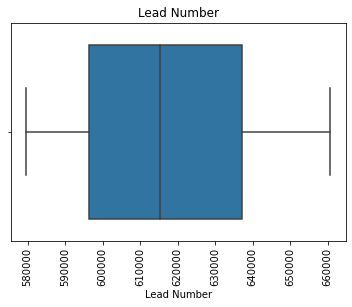

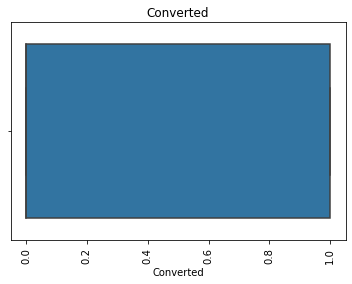

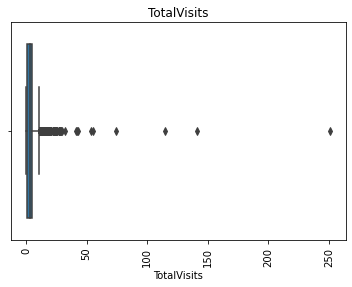

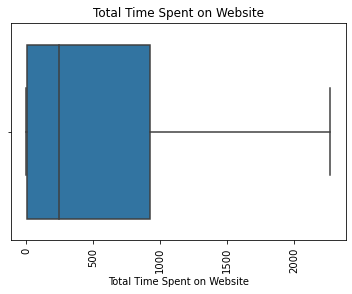

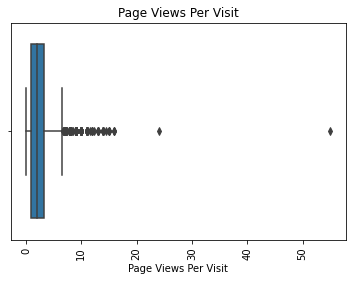

In [51]:
# Checking all numeric columns

for column in Leads:
    if is_numeric_dtype(Leads[column]):
        plt.figure(column)
        plt.title(column)
        plt.xticks(rotation=90)
        sns.boxplot(Leads[column])

In [52]:
Leads["TotalVisits"].describe(percentiles = [0.05,.25,.5,.75,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [53]:
Q3 = Leads.TotalVisits.quantile(0.99)
Leads= Leads[(Leads.TotalVisits<=Q3)]

In [54]:
Q1 = Leads.TotalVisits.quantile(0.01)
Leads= Leads[(Leads.TotalVisits>=Q1)]

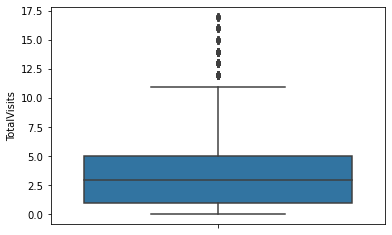

In [55]:
sns.boxplot(y=Leads["TotalVisits"])
plt.show()

In [56]:
Leads["Page Views Per Visit"].describe(percentiles = [0.05,.25,.5,.75,.95,.99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [57]:
Leads = Leads[(Leads["Page Views Per Visit"]<=Q3)]

In [58]:
Leads = Leads[(Leads["Page Views Per Visit"]>=Q1)]

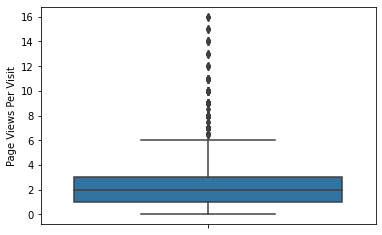

In [59]:
sns.boxplot(y=Leads["Page Views Per Visit"])
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis

### Univariate Analysis

In [60]:
# Checking where leads are converted
Leads_Converted = Leads[Leads['Converted']==1]

In [61]:
# Checking where leads are not converted
Leads_Not_Converted = Leads[Leads['Converted']==0]

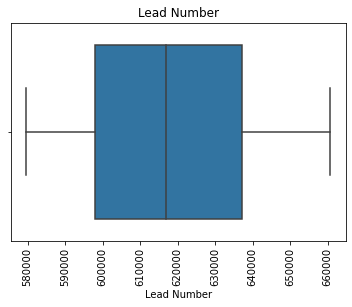

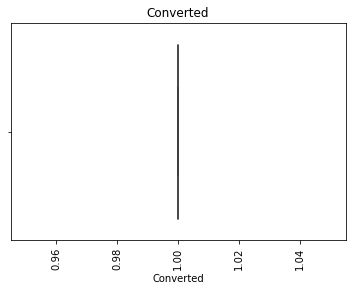

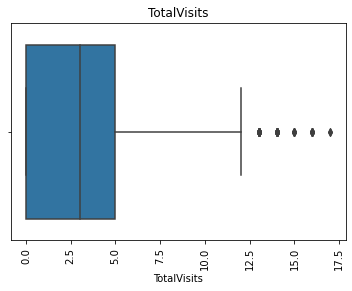

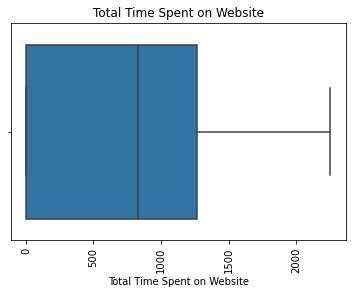

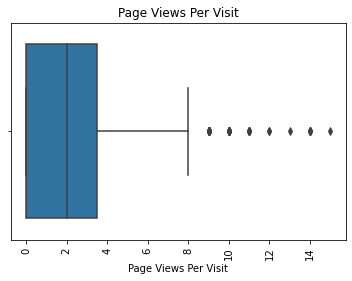

In [62]:
# Checking all the numeric columns for leads converted

for column in Leads_Converted:
    if is_numeric_dtype(Leads_Converted[column]):
        plt.figure(column)
        plt.title(column)
        plt.xticks(rotation=90)
        sns.boxplot(Leads_Converted[column])

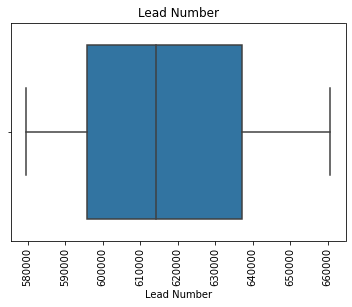

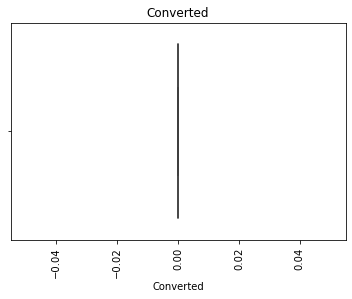

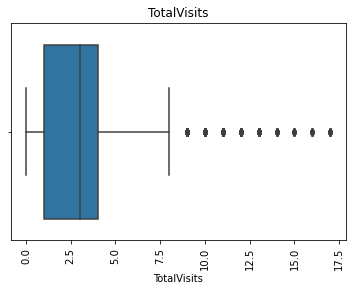

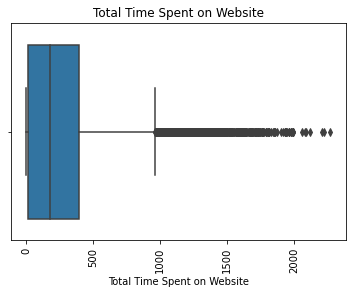

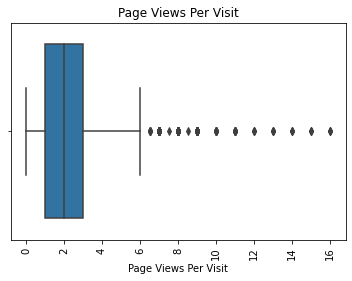

In [63]:
# Checking all the numeric columns for leads not converted

for column in Leads_Not_Converted:
    if is_numeric_dtype(Leads_Not_Converted[column]):
        plt.figure(column)
        plt.title(column)
        plt.xticks(rotation=90)
        sns.boxplot(Leads_Not_Converted[column])

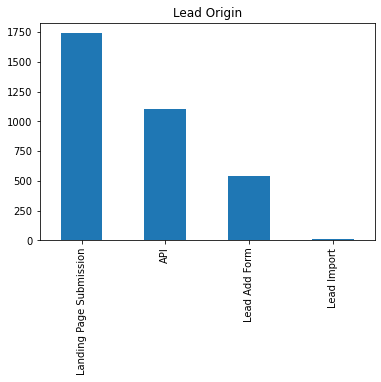

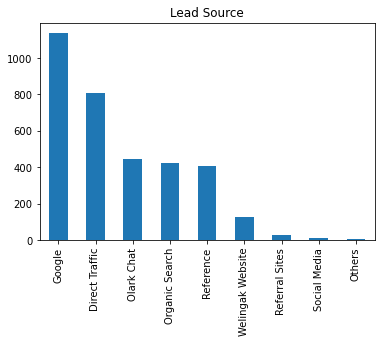

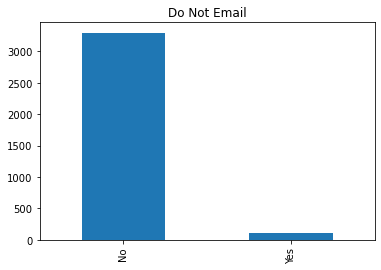

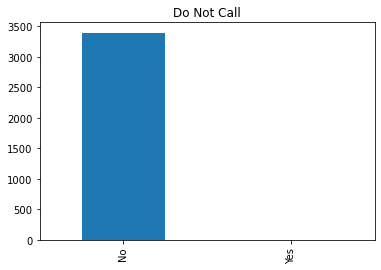

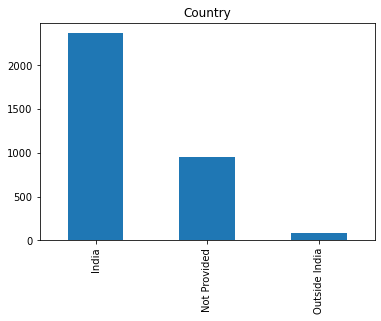

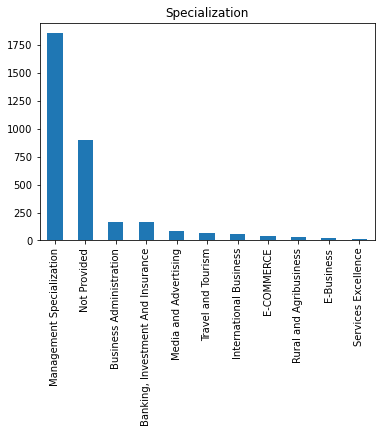

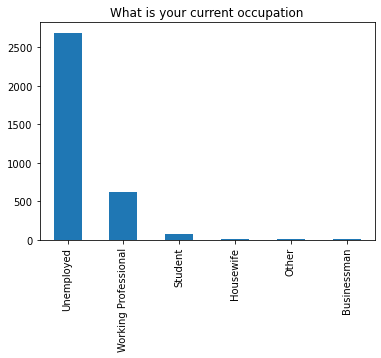

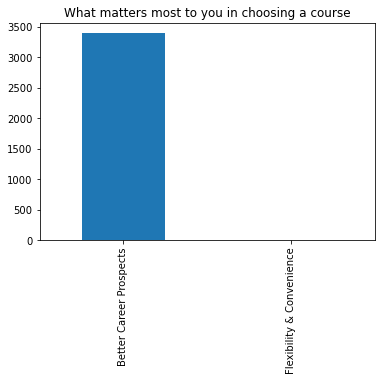

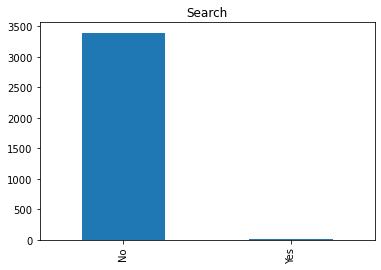

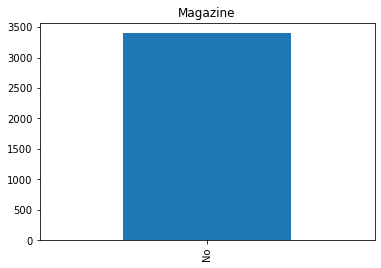

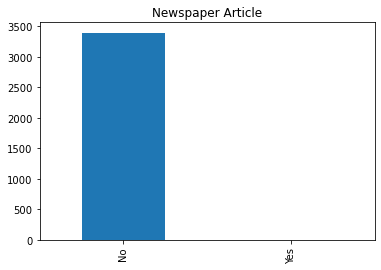

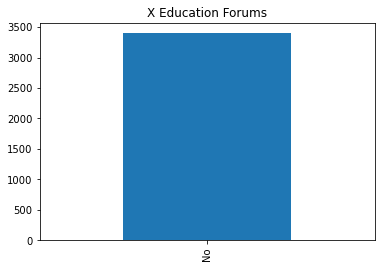

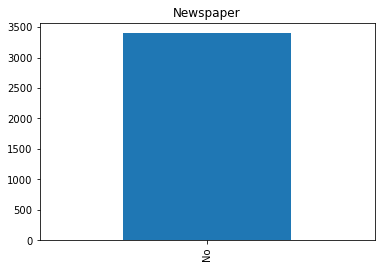

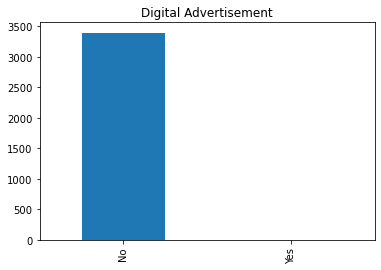

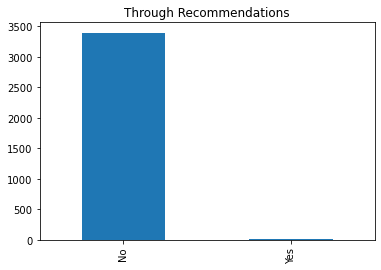

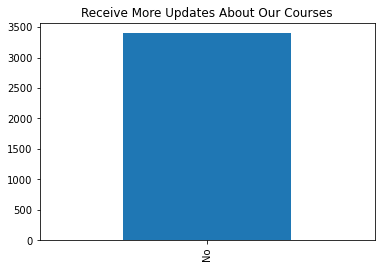

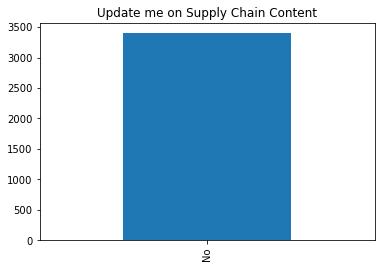

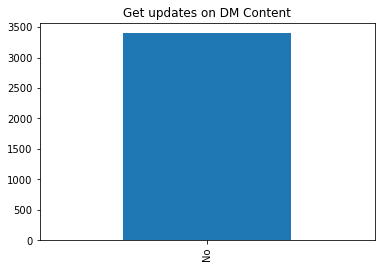

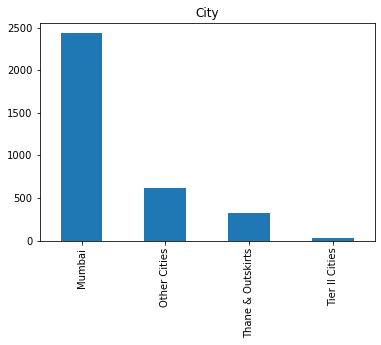

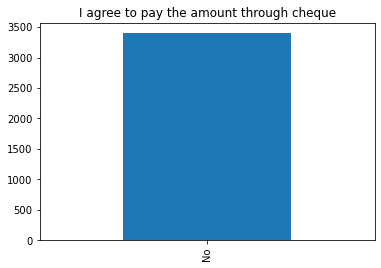

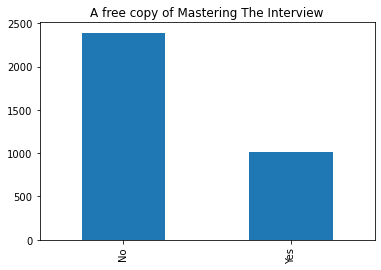

In [64]:
# Checking all the categorical columns for leads converted

for column in Leads_Converted:
    if is_string_dtype(Leads_Converted[column]):
        plt.figure(column)
        plt.title(column)
        Leads_Converted[column].value_counts().plot(kind='bar')

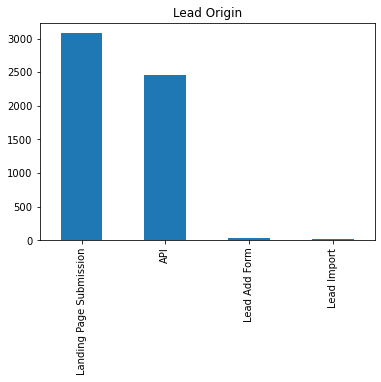

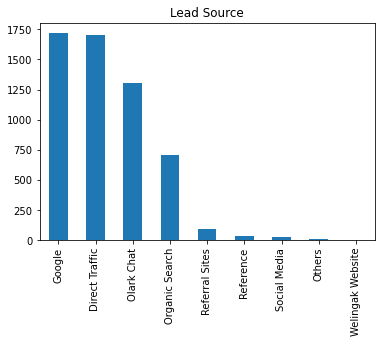

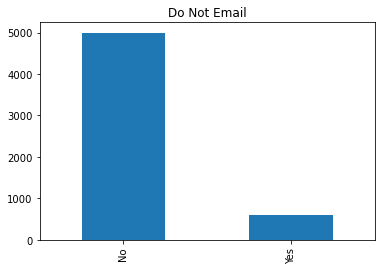

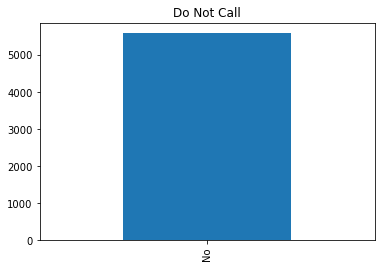

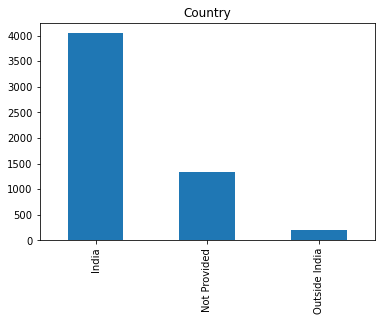

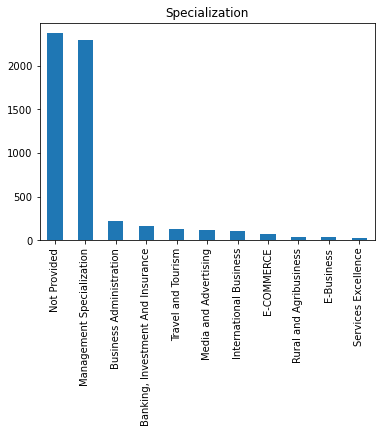

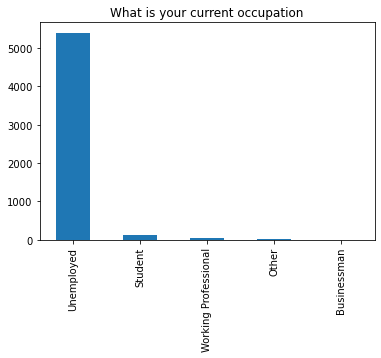

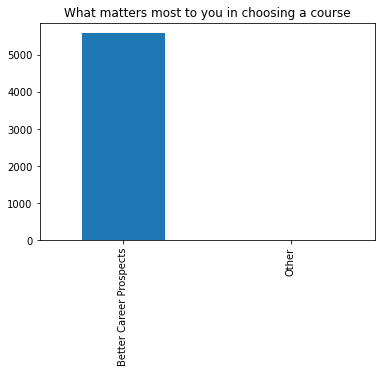

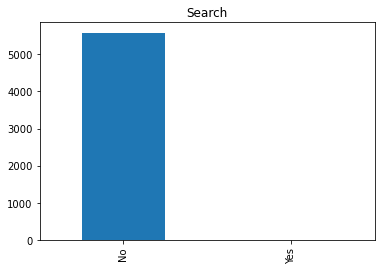

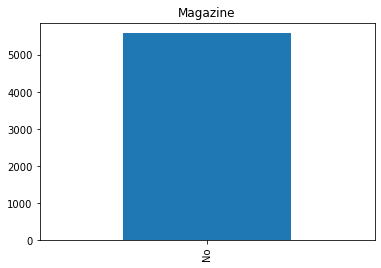

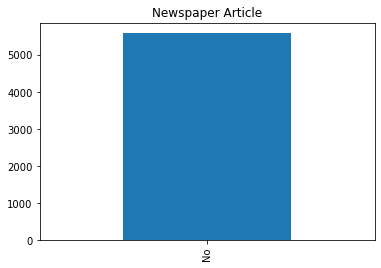

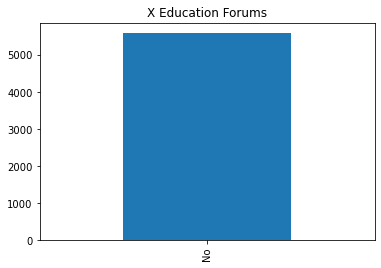

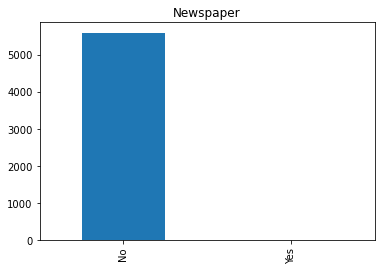

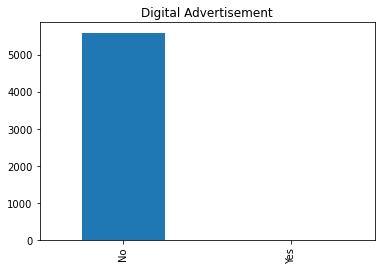

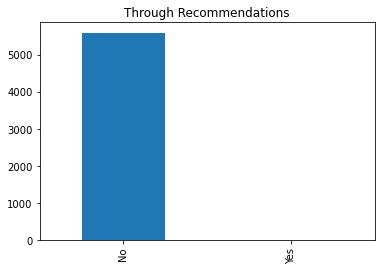

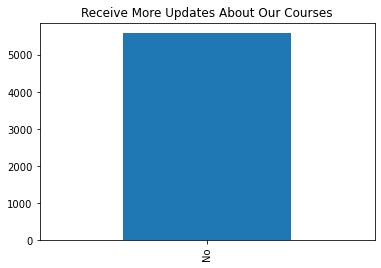

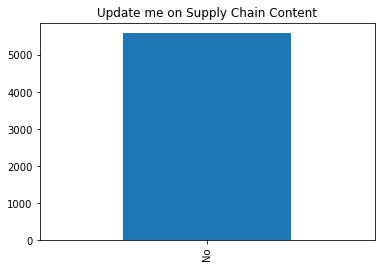

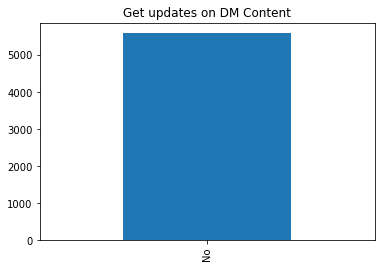

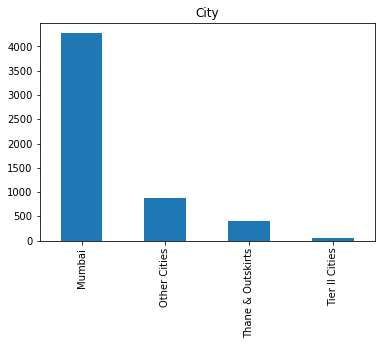

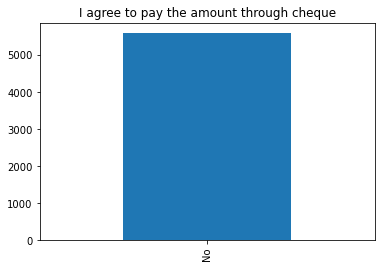

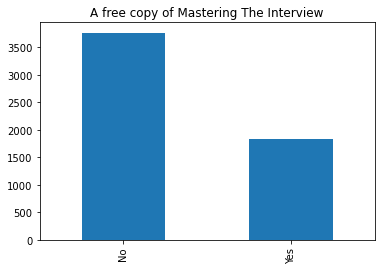

In [65]:
# Checking all the categorical columns for leads not converted

for column in Leads_Not_Converted:
    if is_string_dtype(Leads_Not_Converted[column]):
        plt.figure(column)
        plt.title(column)
        Leads_Not_Converted[column].value_counts().plot(kind='bar')

In [66]:
Leads_Converted.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

 - From EDA we know columns like 'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' are not needed.
 - We will drop these columns

In [67]:
# Dropping un-neccessary columns

cols_to_drop = Leads[['Lead Number','Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 
       'Through Recommendations','Receive More Updates About Our Courses',
        'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque']]

In [68]:
Leads = Leads.drop(cols_to_drop, axis=1)

In [69]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Not Provided,Not Provided,Unemployed,Better Career Prospects,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,India,Not Provided,Unemployed,Better Career Prospects,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Not Provided,Unemployed,Better Career Prospects,Mumbai,No


## Model Building

### Creating dummy variables

In [70]:
# Getting the list of all the categorical and numberical columns

num_list = []
cat_list = []

for column in Leads:
    if is_string_dtype(Leads[column]):
        cat_list.append(column)
    elif is_numeric_dtype(Leads[column]):
        num_list.append(column)

In [71]:
cat_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City',
 'A free copy of Mastering The Interview']

In [72]:
# Creating dummy variables of all the categorical variables

Dummy = pd.get_dummies(Leads[cat_list])

In [73]:
Leads_new = pd.concat([Leads, Dummy], axis=1)

In [74]:
Leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Not Provided,Not Provided,Unemployed,...,0,1,0,0,1,0,0,0,1,0
1,API,Organic Search,No,0,5.0,674,2.5,India,Not Provided,Unemployed,...,0,1,0,0,1,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,...,0,1,0,0,1,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,...,0,1,0,0,1,0,0,0,1,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,Not Provided,Unemployed,...,0,1,0,0,1,0,0,0,1,0


In [75]:
Leads_new = Leads_new.drop(Leads_new[cat_list],axis=1)

In [76]:
Leads_new.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [77]:
# Checking columns where the information is not provided

cols = list(Leads_new.columns)
for i in cols:
    if 'Not Provided' in i:
        print(i)

Country_Not Provided
Specialization_Not Provided


In [78]:
# dropping columns where information is not provided as we cannot make any inferences from these.
Leads_new = Leads_new.drop(['Country_Not Provided','Specialization_Not Provided',], axis=1)

In [79]:
Leads_new.shape

(8991, 46)

### Creating dependent and independent varibales for our model

In [80]:
X = Leads_new.drop('Converted',axis=1)
y = Leads_new['Converted']

In [81]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,5.0,674,2.5,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2.0,1532,2.0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1.0,305,1.0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [82]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling all the numeric columns

In [84]:
Scaler = StandardScaler()

In [85]:
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = Scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [86]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
1467,0.246579,0.764873,0.777363,0,1,0,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
108,0.908719,-0.148599,0.298183,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
7858,2.564067,-0.649536,-0.554758,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5220,-1.077699,-0.881587,-1.139357,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3871,-1.077699,-0.881587,-1.139357,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [87]:
logreg = LogisticRegression()

In [88]:
# Using Recursive Feature Elimination (RFE) technique to select the top 5 columns

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_API', False, 12),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_No', False, 6),
 ('Do Not Email_Yes', True, 1),
 ('Country_India', True, 1),
 ('Country_Outside India', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Interna

In [91]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Country_India', 'Country_Outside India',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Do Not Email_No',
       'Specialization_Business Administration',
       'Specialization_International Business',
       'Specialization_Management Specialization',
       'Specialization_Services Excellence',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What matters most to you in choosing a course_Better Career Prospects',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other', 'City

In [93]:
X_train_sm = sm.add_constant(X_train[col])

In [94]:
log_model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [95]:
log_model1

In [96]:
res = log_model1.fit()

In [97]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.1
Date:                Mon, 12 Apr 2021   Deviance:                       5888.1
Time:                        15:44:14   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2566      0.077     -3.333      0.001      -0.407      -0.106
Total Time Spent on Website                              1.1328      0.038     29.677      0.000       1.058       1.208
Lead Origin_Lead Add Form                                2.0780      0.839      2.476      0.013       0.433       3.723
Lead Source_Reference                                    1.5349      0.875      1.753      0.080      -0.181       3.251
Lead Source_Welingak Website                             3.8768      1.312      2.954      0.003       1.304       6.449
Do Not Email_Yes                                        -1.4765      0.162     -9.091      0.000      -1.795      -1.158
Country_India                                           -0.8616      0.094     -9.171      0.000      -1.046      -0.677
Country_Outside India                                   -1.0411      0.213     -4.893      0.000      -1.458      -0.624
Specialization_Banking, Investment And Insurance         0.6586      0.167      3.948      0.000       0.332       0.986
Specialization_E-Business                                0.3231      0.392      0.824      0.410      -0.445       1.091
Specialization_E-COMMERCE                                0.2661      0.288      0.924      0.356      -0.299       0.831
Specialization_Media and Advertising                     0.2362      0.216      1.093      0.274      -0.187       0.660
Specialization_Rural and Agribusiness                    0.5490      0.347      1.584      0.113      -0.130       1.228
Specialization_Travel and Tourism                        0.3236      0.214      1.515      0.130      -0.095       0.742
What is your current occupation_Housewife               22.7407   1.78e+04      0.001      0.999   -3.48e+04    3.48e+04
What is your current occupation_Working Professional     2.8755      0.183     15.695      0.000       2.516       3.235
========================================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,43.23
2,Lead Source_Reference,33.90
3,Lead Source_Welingak Website,10.45
5,Country_India,1.32
14,What is your current occupation_Working Profes...,1.15
0,Total Time Spent on Website,1.12
4,Do Not Email_Yes,1.10
7,"Specialization_Banking, Investment And Insurance",1.05
12,Specialization_Travel and Tourism,1.04
10,Specialization_Media and Advertising,1.03


In [99]:
# Dropping 'Lead Origin_Lead Add Form' as the VIF is too high.

X = X_train_sm.drop(['Lead Origin_Lead Add Form'], axis=1)

In [100]:
X_train_lm = sm.add_constant(X)
log_model2 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [101]:
log_model2

In [102]:
res = log_model2.fit()

In [103]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.7
Date:                Mon, 12 Apr 2021   Deviance:                       5895.4
Time:                        15:44:14   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2398      0.076     -3.136      0.002      -0.390      -0.090
Total Time Spent on Website                              1.1340      0.038     29.718      0.000       1.059       1.209
Lead Source_Reference                                    3.5977      0.267     13.496      0.000       3.075       4.120
Lead Source_Welingak Website                             5.9402      1.013      5.862      0.000       3.954       7.926
Do Not Email_Yes                                        -1.4791      0.162     -9.108      0.000      -1.797      -1.161
Country_India                                           -0.8779      0.094     -9.385      0.000      -1.061      -0.695
Country_Outside India                                   -1.0578      0.213     -4.975      0.000      -1.474      -0.641
Specialization_Banking, Investment And Insurance         0.6574      0.167      3.940      0.000       0.330       0.984
Specialization_E-Business                                0.3223      0.392      0.822      0.411      -0.446       1.091
Specialization_E-COMMERCE                                0.2651      0.288      0.920      0.358      -0.300       0.830
Specialization_Media and Advertising                     0.2350      0.216      1.087      0.277      -0.189       0.659
Specialization_Rural and Agribusiness                    0.5472      0.347      1.579      0.114      -0.132       1.227
Specialization_Travel and Tourism                        0.3228      0.214      1.511      0.131      -0.096       0.742
What is your current occupation_Housewife               22.7414   1.78e+04      0.001      0.999   -3.48e+04    3.48e+04
What is your current occupation_Working Professional     2.8724      0.183     15.678      0.000       2.513       3.232
========================================================================================================================
"""

In [104]:
X = X.drop('const',axis=1)

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.32
13,What is your current occupation_Working Profes...,1.15
1,Lead Source_Reference,1.13
0,Total Time Spent on Website,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
11,Specialization_Travel and Tourism,1.04
9,Specialization_Media and Advertising,1.03
5,Country_Outside India,1.02
8,Specialization_E-COMMERCE,1.02


In [106]:
# Dropping 'What is your current occupation_Housewife' as the p-value is too high.

X = X_train_lm.drop(['What is your current occupation_Housewife'], axis=1)

In [107]:
X_train_lm = sm.add_constant(X)
log_model3 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [108]:
log_model3

In [109]:
res = log_model3.fit()

In [110]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.6
Date:                Mon, 12 Apr 2021   Deviance:                       5901.1
Time:                        15:44:14   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2417      0.076     -3.162      0.002      -0.392      -0.092
Total Time Spent on Website                              1.1325      0.038     29.715      0.000       1.058       1.207
Lead Source_Reference                                    3.6222      0.266     13.607      0.000       3.100       4.144
Lead Source_Welingak Website                             5.9415      1.013      5.863      0.000       3.955       7.928
Do Not Email_Yes                                        -1.4813      0.162     -9.120      0.000      -1.800      -1.163
Country_India                                           -0.8733      0.093     -9.345      0.000      -1.056      -0.690
Country_Outside India                                   -1.0478      0.212     -4.950      0.000      -1.463      -0.633
Specialization_Banking, Investment And Insurance         0.6550      0.167      3.926      0.000       0.328       0.982
Specialization_E-Business                                0.3199      0.392      0.816      0.414      -0.448       1.088
Specialization_E-COMMERCE                                0.2626      0.288      0.912      0.362      -0.302       0.827
Specialization_Media and Advertising                     0.2332      0.216      1.080      0.280      -0.190       0.657
Specialization_Rural and Agribusiness                    0.5453      0.347      1.574      0.116      -0.134       1.225
Specialization_Travel and Tourism                        0.3209      0.214      1.503      0.133      -0.098       0.739
What is your current occupation_Working Professional     2.8702      0.183     15.666      0.000       2.511       3.229
========================================================================================================================
"""

In [111]:
X = X.drop('const',axis=1)

In [112]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.32
12,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
11,Specialization_Travel and Tourism,1.04
9,Specialization_Media and Advertising,1.03
5,Country_Outside India,1.02
8,Specialization_E-COMMERCE,1.02


In [113]:
# Dropping 'Specialization_E-Business' as the p-value is too high.

X = X_train_lm.drop(['Specialization_E-Business'], axis=1)

In [114]:
X_train_lm = sm.add_constant(X)
log_model4 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [115]:
log_model4

In [116]:
res = log_model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.9
Date:                Mon, 12 Apr 2021   Deviance:                       5901.8
Time:                        15:44:14   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2416      0.076     -3.161      0.002      -0.391      -0.092
Total Time Spent on Website                              1.1324      0.038     29.713      0.000       1.058       1.207
Lead Source_Reference                                    3.6243      0.266     13.616      0.000       3.103       4.146
Lead Source_Welingak Website                             5.9408      1.013      5.863      0.000       3.955       7.927
Do Not Email_Yes                                        -1.4800      0.162     -9.112      0.000      -1.798      -1.162
Country_India                                           -0.8701      0.093     -9.321      0.000      -1.053      -0.687
Country_Outside India                                   -1.0463      0.212     -4.943      0.000      -1.461      -0.631
Specialization_Banking, Investment And Insurance         0.6520      0.167      3.909      0.000       0.325       0.979
Specialization_E-COMMERCE                                0.2596      0.288      0.901      0.367      -0.305       0.824
Specialization_Media and Advertising                     0.2302      0.216      1.066      0.287      -0.193       0.653
Specialization_Rural and Agribusiness                    0.5423      0.347      1.565      0.118      -0.137       1.222
Specialization_Travel and Tourism                        0.3178      0.214      1.488      0.137      -0.101       0.736
What is your current occupation_Working Professional     2.8679      0.183     15.657      0.000       2.509       3.227
========================================================================================================================
"""

In [117]:
X = X.drop('const',axis=1)

In [118]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.31
11,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
8,Specialization_Media and Advertising,1.03
10,Specialization_Travel and Tourism,1.03
5,Country_Outside India,1.02
7,Specialization_E-COMMERCE,1.02


In [119]:
# Dropping 'Specialization_E-COMMERCE' as the p-value is too high.

X = X_train_lm.drop(['Specialization_E-COMMERCE'], axis=1)

In [120]:
X_train_lm = sm.add_constant(X)
log_model5 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [121]:
log_model5

In [122]:
res = log_model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.3
Date:                Mon, 12 Apr 2021   Deviance:                       5902.6
Time:                        15:44:15   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2416      0.076     -3.161      0.002      -0.391      -0.092
Total Time Spent on Website                              1.1315      0.038     29.710      0.000       1.057       1.206
Lead Source_Reference                                    3.6258      0.266     13.624      0.000       3.104       4.147
Lead Source_Welingak Website                             5.9391      1.013      5.861      0.000       3.953       7.925
Do Not Email_Yes                                        -1.4776      0.162     -9.095      0.000      -1.796      -1.159
Country_India                                           -0.8655      0.093     -9.289      0.000      -1.048      -0.683
Country_Outside India                                   -1.0418      0.212     -4.923      0.000      -1.457      -0.627
Specialization_Banking, Investment And Insurance         0.6476      0.167      3.885      0.000       0.321       0.974
Specialization_Media and Advertising                     0.2258      0.216      1.046      0.296      -0.197       0.649
Specialization_Rural and Agribusiness                    0.5380      0.346      1.553      0.120      -0.141       1.217
Specialization_Travel and Tourism                        0.3132      0.213      1.467      0.142      -0.105       0.731
What is your current occupation_Working Professional     2.8685      0.183     15.661      0.000       2.509       3.227
========================================================================================================================
"""

In [123]:
X = X.drop('const',axis=1)

In [124]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.30
10,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
7,Specialization_Media and Advertising,1.03
9,Specialization_Travel and Tourism,1.03
5,Country_Outside India,1.02
2,Lead Source_Welingak Website,1.01


In [125]:
# Dropping 'Specialization_Media and Advertising' as the p-value is too high.

X = X_train_lm.drop(['Specialization_Media and Advertising'], axis=1)

In [126]:
X_train_lm = sm.add_constant(X)
log_model6 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [127]:
log_model6

In [128]:
res = log_model6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.8
Date:                Mon, 12 Apr 2021   Deviance:                       5903.6
Time:                        15:44:15   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2403      0.076     -3.144      0.002      -0.390      -0.091
Total Time Spent on Website                              1.1319      0.038     29.725      0.000       1.057       1.207
Lead Source_Reference                                    3.6246      0.266     13.621      0.000       3.103       4.146
Lead Source_Welingak Website                             5.9372      1.013      5.859      0.000       3.951       7.923
Do Not Email_Yes                                        -1.4747      0.162     -9.085      0.000      -1.793      -1.157
Country_India                                           -0.8599      0.093     -9.247      0.000      -1.042      -0.678
Country_Outside India                                   -1.0409      0.212     -4.918      0.000      -1.456      -0.626
Specialization_Banking, Investment And Insurance         0.6409      0.167      3.848      0.000       0.315       0.967
Specialization_Rural and Agribusiness                    0.5313      0.346      1.534      0.125      -0.148       1.210
Specialization_Travel and Tourism                        0.3060      0.213      1.435      0.151      -0.112       0.724
What is your current occupation_Working Professional     2.8700      0.183     15.674      0.000       2.511       3.229
========================================================================================================================
"""

In [129]:
X = X.drop('const',axis=1)

In [130]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.26
9,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
8,Specialization_Travel and Tourism,1.03
5,Country_Outside India,1.02
2,Lead Source_Welingak Website,1.01
7,Specialization_Rural and Agribusiness,1.01


In [131]:
# Dropping 'Specialization_Travel and Tourism' as the p-value is too high.

X = X_train_lm.drop(['Specialization_Travel and Tourism'], axis=1)

In [132]:
X_train_lm = sm.add_constant(X)
log_model7 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [133]:
log_model7

In [134]:
res = log_model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.8
Date:                Mon, 12 Apr 2021   Deviance:                       5905.7
Time:                        15:44:15   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2398      0.076     -3.137      0.002      -0.390      -0.090
Total Time Spent on Website                              1.1321      0.038     29.733      0.000       1.057       1.207
Lead Source_Reference                                    3.6232      0.266     13.619      0.000       3.102       4.145
Lead Source_Welingak Website                             5.9328      1.013      5.856      0.000       3.947       7.919
Do Not Email_Yes                                        -1.4635      0.162     -9.035      0.000      -1.781      -1.146
Country_India                                           -0.8513      0.093     -9.179      0.000      -1.033      -0.670
Country_Outside India                                   -1.0332      0.212     -4.884      0.000      -1.448      -0.619
Specialization_Banking, Investment And Insurance         0.6321      0.166      3.798      0.000       0.306       0.958
Specialization_Rural and Agribusiness                    0.5220      0.346      1.508      0.132      -0.157       1.201
What is your current occupation_Working Professional     2.8691      0.183     15.675      0.000       2.510       3.228
========================================================================================================================
"""

In [135]:
X = X.drop('const',axis=1)

In [136]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.24
8,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
5,Country_Outside India,1.02
2,Lead Source_Welingak Website,1.01
7,Specialization_Rural and Agribusiness,1.01


In [137]:
# Dropping 'Specialization_Rural and Agribusiness' as the p-value is too high.

X = X_train_lm.drop(['Specialization_Rural and Agribusiness'], axis=1)

In [138]:
X_train_lm = sm.add_constant(X)
log_model8 = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial())

In [139]:
log_model8

In [140]:
res = log_model8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2953.9
Date:                Mon, 12 Apr 2021   Deviance:                       5907.9
Time:                        15:44:15   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2382      0.076     -3.116      0.002      -0.388      -0.088
Total Time Spent on Website                              1.1322      0.038     29.744      0.000       1.058       1.207
Lead Source_Reference                                    3.6237      0.266     13.622      0.000       3.102       4.145
Lead Source_Welingak Website                             5.9305      1.013      5.853      0.000       3.945       7.916
Do Not Email_Yes                                        -1.4612      0.162     -9.013      0.000      -1.779      -1.143
Country_India                                           -0.8472      0.093     -9.141      0.000      -1.029      -0.666
Country_Outside India                                   -1.0348      0.212     -4.892      0.000      -1.449      -0.620
Specialization_Banking, Investment And Insurance         0.6266      0.166      3.766      0.000       0.301       0.953
What is your current occupation_Working Professional     2.8670      0.183     15.670      0.000       2.508       3.226
========================================================================================================================
"""

In [141]:
X = X.drop('const',axis=1)

In [142]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Country_India,1.23
7,What is your current occupation_Working Profes...,1.14
0,Total Time Spent on Website,1.12
1,Lead Source_Reference,1.12
3,Do Not Email_Yes,1.10
6,"Specialization_Banking, Investment And Insurance",1.05
5,Country_Outside India,1.02
2,Lead Source_Welingak Website,1.01


-------------------------------------------------------------------------------------------------------------------------------

### Making predications on the train set

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_lm)
y_train_pred[:10]

1467    0.933864
108     0.222076
7858    0.139343
5220    0.225085
3871    0.225085
686     0.488939
1694    0.225085
2180    0.153944
6845    0.225085
191     0.125462
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93386413, 0.2220757 , 0.13934284, 0.22508543, 0.22508543,
       0.48893899, 0.22508543, 0.15394446, 0.22508543, 0.12546178])

In [145]:
# Creating a dataframe with actual conversion rate and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.933864,1467
1,0,0.222076,108
2,1,0.139343,7858
3,1,0.225085,5220
4,0,0.225085,3871


In [146]:
# We are selecting 0.5 as a cut-off.

y_train_pred_final['converted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,converted
0,1,0.933864,1467,1
1,0,0.222076,108,0
2,1,0.139343,7858,0
3,1,0.225085,5220,0
4,0,0.225085,3871,0
5,1,0.488939,686,0
6,0,0.225085,1694,0
7,0,0.153944,2180,0
8,0,0.225085,6845,0
9,0,0.125462,191,0


-------------------------------------------------------------------------------------------------------------------------------

### Checking confusion matrix and Acuuracy of the model

In [147]:
# Checking the Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.converted)
print(confusion)

[[3467  459]
 [ 884 1483]]


### Accuracy
 - TP+FP / (TP+FP+TN+FN)

In [148]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.converted))

0.7865882726839345


 - We are getting 78.65% accuracy on the training set which is actually a good number.

### Metrics beyond simple Accuracy

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity
 - TP / (TP+FN)

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6265314744402197

### Specificity
 - TN / (TN+FP)

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.8830871115639327

In [152]:
# Calculate false postive rate - predicting conversion rate when customer did not convert

print(FP/ float(TN+FP))

0.11691288843606724


In [153]:
# positive predictive value 

print (TP / float(TP+FP))

0.7636457260556128


In [154]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7968283153298092


-------------------------------------------------------------------------------------------------------------------------------

### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

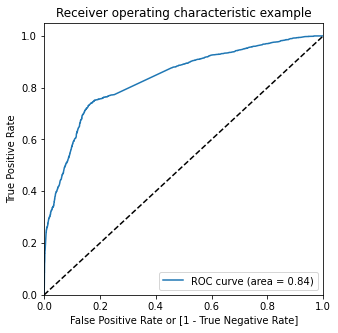

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

-------------------------------------------------------------------------------------------------------------------------------

### Finding Optimal Cutoff Point

In [158]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.933864,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.222076,108,0,1,1,1,0,0,0,0,0,0,0
2,1,0.139343,7858,0,1,1,0,0,0,0,0,0,0,0
3,1,0.225085,5220,0,1,1,1,0,0,0,0,0,0,0
4,0,0.225085,3871,0,1,1,1,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.431273  0.993240  0.092461
0.2   0.2  0.639600  0.895226  0.485481
0.3   0.3  0.794851  0.745670  0.824503
0.4   0.4  0.799301  0.697507  0.860672
0.5   0.5  0.786588  0.626531  0.883087
0.6   0.6  0.768632  0.530207  0.912379
0.7   0.7  0.749245  0.421208  0.947020
0.8   0.8  0.727634  0.313477  0.977331
0.9   0.9  0.710790  0.243768  0.992359


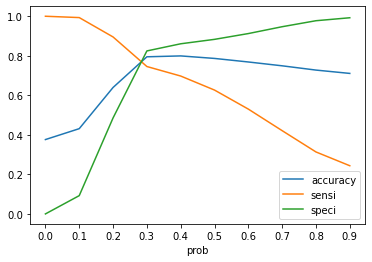

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.1))
plt.show()

In [161]:
y_train_pred_final['final_converted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_converted
0,1,0.933864,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.222076,108,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.139343,7858,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.225085,5220,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.225085,3871,0,1,1,1,0,0,0,0,0,0,0,0


In [162]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_converted)

0.8002542507548069

In [163]:
# Lets create confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_converted)
confusion2

array([[3328,  598],
       [ 659, 1708]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.721588508660752

In [166]:
# Let us calculate specificity

TN / float(TN+FP)

0.847682119205298

In [167]:
# Calculate false postive rate - predicting conversion rate when customer did not convert.

print(FP/ float(TN+FP))

0.152317880794702


In [168]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7406764960971379


In [169]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8347128166541259


### Precision and Recall.

In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_converted)
confusion

array([[3328,  598],
       [ 659, 1708]], dtype=int64)

#### Precision
TP / TP + FP

In [171]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7406764960971379

#### Recall
TP / TP + FN

In [172]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.721588508660752

##### Using Sklearn utilities for the same.

In [173]:
# Checking precision score

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_converted)

0.7406764960971379

In [174]:
# Checking recall score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_converted)

0.721588508660752

### Precision and recall tradeoff

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

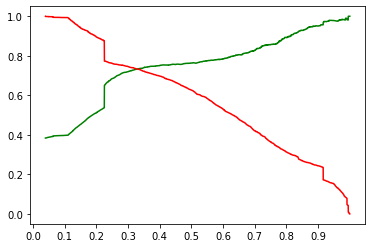

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,0.1))
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Making predictions on the test set

In [177]:
# Transforming all the numerical variables

X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = Scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [178]:
X_train_lm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Country_India',
       'Country_Outside India',
       'Specialization_Banking, Investment And Insurance',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [179]:
X = X_train_lm.drop('const',axis=1)

In [180]:
col = X.columns

In [181]:
col

Index(['Total Time Spent on Website', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Country_India',
       'Country_Outside India',
       'Specialization_Banking, Investment And Insurance',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [182]:
X_test = X_test[col]

In [183]:
X_test.head()

,Total Time Spent on Website,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Country_India,Country_Outside India,"Specialization_Banking, Investment And Insurance",What is your current occupation_Working Professional
8692,-0.321717,0,0,0,1,0,0,0
6126,-0.881587,1,0,0,0,0,0,0
5198,-0.098874,0,0,0,0,1,0,0
4979,0.704098,0,0,0,1,0,0,0
9225,-0.745303,0,0,1,0,1,0,0


In [184]:
X_test_sm = sm.add_constant(X_test)

In [185]:
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

8692    0.190062
6126    0.915864
5198    0.200219
4979    0.428443
9225    0.027173
3533    0.165124
2726    0.881364
3450    0.043692
7683    0.809152
6286    0.046473
dtype: float64

In [187]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [188]:
y_pred_1.head()

,0
8692,0.190062
6126,0.915864
5198,0.200219
4979,0.428443
9225,0.027173


In [189]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [190]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [191]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [193]:
y_pred_final.head()

,Converted,LeadID,0
0,0,8692,0.190062
1,1,6126,0.915864
2,1,5198,0.200219
3,1,4979,0.428443
4,0,9225,0.027173


In [194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [195]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_prob'], axis=1)

In [196]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_prob
0,8692,0,0.190062
1,6126,1,0.915864
2,5198,1,0.200219
3,4979,1,0.428443
4,9225,0,0.027173


In [197]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35 else 0)

In [198]:
y_pred_final.head()

,LeadID,Converted,Conversion_prob,final_predicted
0,8692,0,0.190062,0
1,6126,1,0.915864,1
2,5198,1,0.200219,0
3,4979,1,0.428443,1
4,9225,0,0.027173,0


In [199]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.799110452186805

In [200]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1389,  277],
       [ 265,  767]], dtype=int64)

In [201]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7432170542635659

In [203]:
# Let us calculate specificity
TN / float(TN+FP)

0.8337334933973589

In [204]:
# Let us calculate precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7346743295019157

In [205]:
# Let us calculate recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7432170542635659

**Conclusions**
 - For training dataset
     - Accuracy : 80%
     - Sensitivity : 72% 
     - Specificity : 85%
     - Precision : 74%
     - Recall : 72%
     
- For testing dataset
     - Accuracy : 80%
     - Sensitivity : 74%
     - Specificity : 83%
     - Precision : 73%
     - Recall : 74%

-------------------------------------------------------------------------------------------------------------------------------
- This means overall our model is performing good and able to give 80% accuracy on both train and test data.

-------------------------------------------------------------------------------------------------------------------------------

## Thank You.

-------------------------------------------------------------------------------------------------------------------------------